In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
from sklearn.tree import DecisionTreeRegressor

In [3]:
df = pd.read_csv("NFLX.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,16-12-2015,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,17-12-2015,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,18-12-2015,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,21-12-2015,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,22-12-2015,117.300003,117.430000,114.860001,116.239998,116.239998,9689000


In [4]:
df.shape

(1007, 7)

In [5]:
# Visualise the close price data

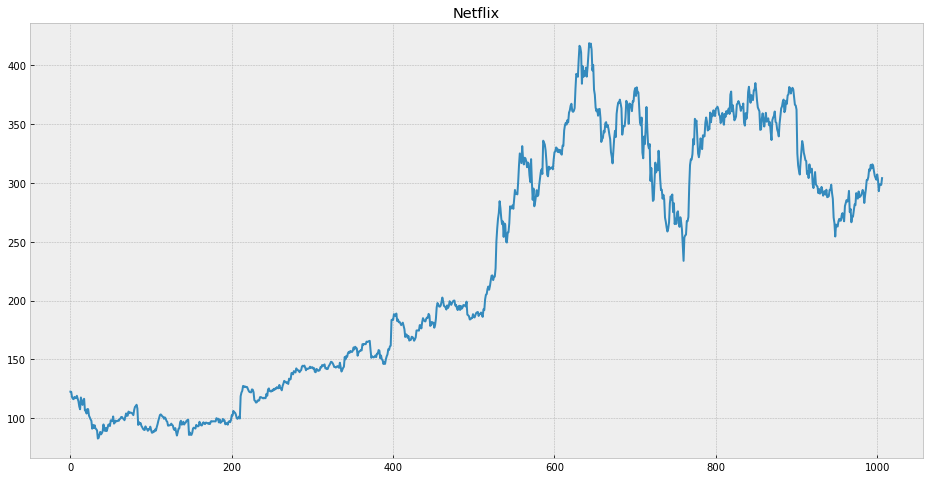

In [6]:
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.plot(df['Close'])

In [7]:
# get the Close price

In [8]:
df = df[['Close']]
df.head(4)

,Close
0,122.639999
1,122.510002
2,118.019997
3,116.629997


In [9]:
# Creat a variable to prdict 'x' days out in the future

In [10]:
future_days = 25
# Creat new column (target) shiftet 'x' days
df['Predictions'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Predictions
1003,298.929993,NaN
1004,298.440002,NaN
1005,298.500000,NaN
1006,304.209991,NaN


In [11]:
# Creat the feature data set(x) and convert it
x = np.array(df.drop(['Predictions'], 1))[:-future_days]
print(x)

[[122.639999]
 [122.510002]
 [118.019997]
 [116.629997]
 [116.239998]
 [118.160004]
 [117.330002]
 [117.110001]
 [119.120003]
 [116.709999]
 [114.379997]
 [109.959999]
 [107.660004]
 [117.68    ]
 [114.559998]
 [111.389999]
 [114.970001]
 [116.580002]
 [106.559998]
 [107.059998]
 [104.040001]
 [107.889999]
 [107.739998]
 [102.349998]
 [100.720001]
 [ 99.120003]
 [ 97.830002]
 [ 91.150002]
 [ 94.410004]
 [ 91.839996]
 [ 94.089996]
 [ 91.489998]
 [ 90.739998]
 [ 89.709999]
 [ 82.790001]
 [ 83.32    ]
 [ 86.129997]
 [ 88.449997]
 [ 86.349998]
 [ 87.400002]
 [ 89.050003]
 [ 94.760002]
 [ 90.489998]
 [ 89.230003]
 [ 91.93    ]
 [ 89.120003]
 [ 91.610001]
 [ 94.529999]
 [ 94.790001]
 [ 93.410004]
 [ 98.300003]
 [ 97.610001]
 [ 97.93    ]
 [101.580002]
 [ 95.489998]
 [ 96.230003]
 [ 98.      ]
 [ 97.360001]
 [ 97.660004]
 [ 98.129997]
 [ 97.860001]
 [ 99.349998]
 [ 99.720001]
 [101.120003]
 [101.059998]
 [ 99.839996]
 [ 99.589996]
 [ 98.360001]
 [101.209999]
 [104.129997]
 [102.190002]
 [102.

In [12]:
# Creat the targte data (y) and convert it to numpy array
y = np.array(df['Predictions'])[:-future_days]
print(y)

[ 99.120003  97.830002  91.150002  94.410004  91.839996  94.089996
  91.489998  90.739998  89.709999  82.790001  83.32      86.129997
  88.449997  86.349998  87.400002  89.050003  94.760002  90.489998
  89.230003  91.93      89.120003  91.610001  94.529999  94.790001
  93.410004  98.300003  97.610001  97.93     101.580002  95.489998
  96.230003  98.        97.360001  97.660004  98.129997  97.860001
  99.349998  99.720001 101.120003 101.059998  99.839996  99.589996
  98.360001 101.209999 104.129997 102.190002 102.230003 105.699997
 104.349998 104.940002 104.830002 104.449997 103.809998 102.68
 106.980003 109.650002 110.419998 111.510002 108.400002  94.339996
  96.769997  94.980003  95.900002  93.559998  92.43      91.040001
  90.279999  90.029999  93.110001  91.540001  90.790001  89.370003
  90.839996  90.540001  92.889999  90.019997  87.739998  87.879997
  89.120003  88.629997  90.5       89.550003  92.489998  94.889999
  97.889999 100.199997 102.809998 103.300003 102.57     101.510002

 298.929993 298.440002 298.5      304.209991]


In [13]:
# Split the data

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [15]:
# Creat the models

In [16]:
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [18]:
lr = LinearRegression().fit(x_train, y_train)

In [19]:
#get the last 'x' rows of the feature data set
x_future = df.drop(['Predictions'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[274.459991],
       [270.720001],
       [267.529999],
       [280.480011],
       [282.929993],
       [285.529999],
       [284.25    ],
       [286.279999],
       [293.350006],
       [275.299988],
       [278.049988],
       [266.690002],
       [271.269989],
       [271.5     ],
       [276.820007],
       [281.859985],
       [281.209991],
       [291.450012],
       [287.410004],
       [286.809998],
       [292.859985],
       [288.029999],
       [288.589996],
       [289.570007],
       [291.570007]])

In [20]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[294.179993 292.01001  283.109985 289.619995 295.029999 302.570007
 302.600006 305.160004 311.690002 310.480011 295.350006 297.570007
 315.929993 315.929993 309.98999  306.160004 304.320007 302.859985
 284.25     302.5      293.119995 298.929993 298.440002 298.5
 304.209991]


In [21]:
# Show Linear regression Model
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[276.96909793 273.40310523 270.36151319 282.70904571 285.04504605
 287.52409076 286.30364175 288.23919816 294.98028391 277.77001535
 280.39207581 269.56059576 273.92750588 274.14681597 279.2193178
 284.02481854 283.40506451 293.16868422 289.3166314  288.74453976
 294.51306038 289.90778209 290.44172608 291.37614357 293.28309663]


In [22]:
# Visulaize the data

<ipython-input-23-f41607939250>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


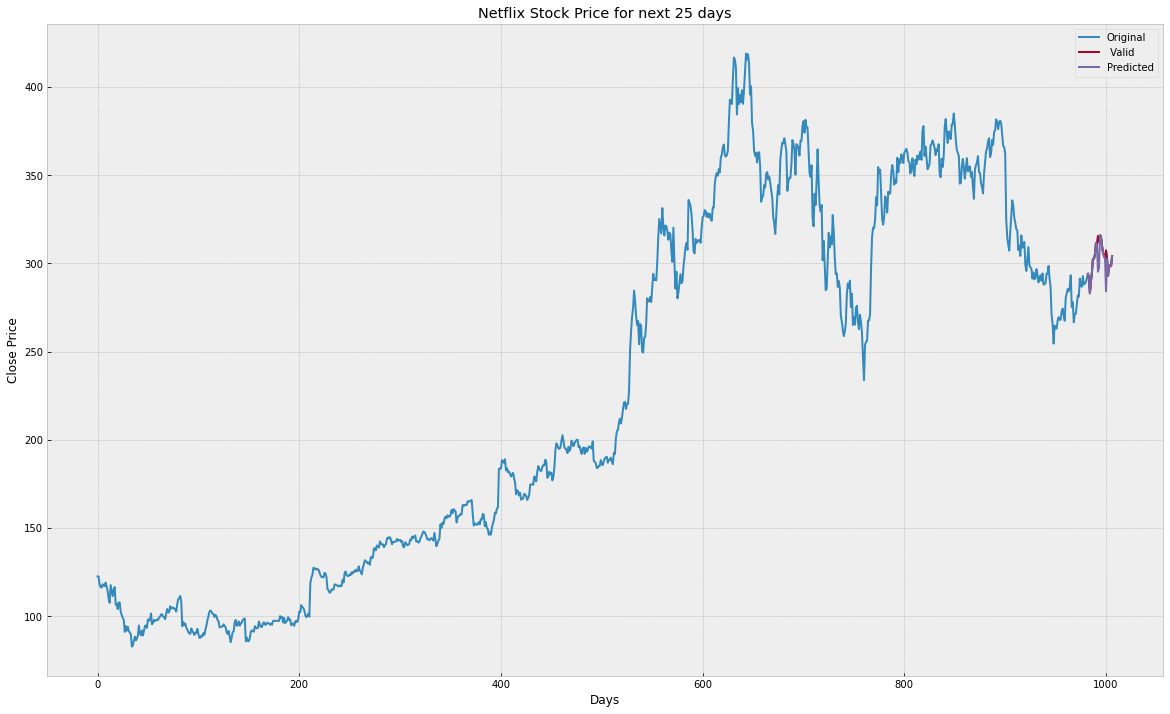

In [23]:
predictions = tree_prediction
valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(20,12))
plt.title("Netflix Stock Price for next 25 days")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original',' Valid', 'Predicted'])
plt.show()

<ipython-input-24-14e744c7bfde>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


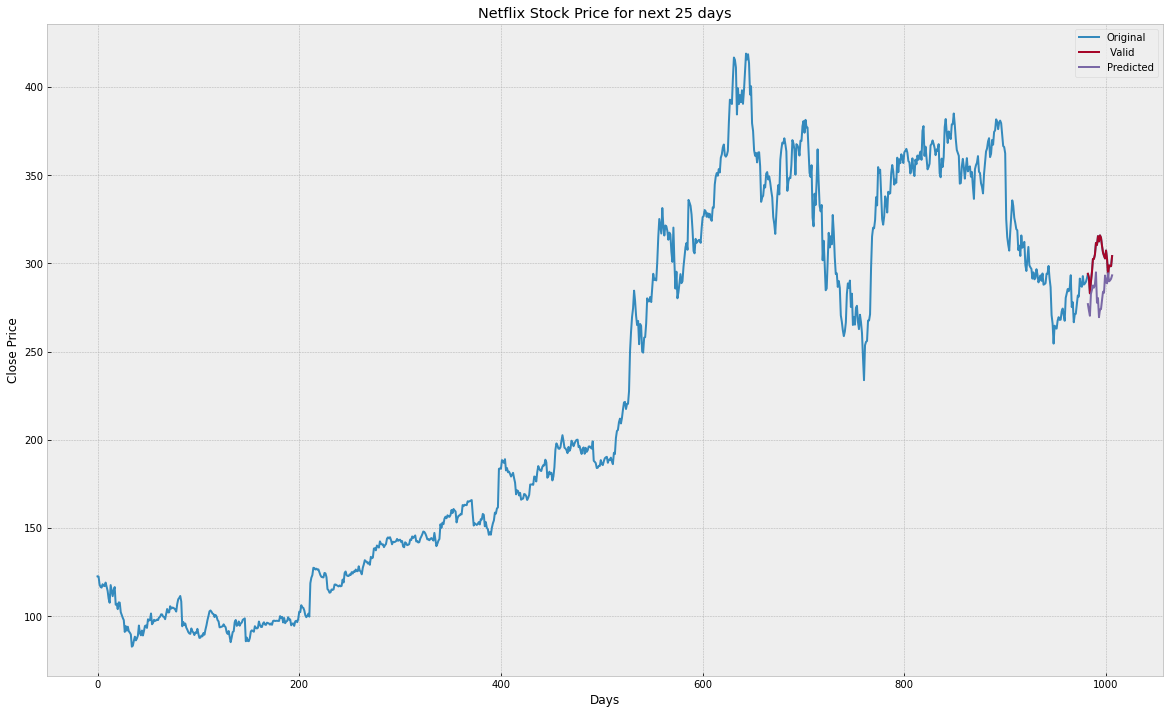

In [24]:
predictions = lr_prediction
valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(20,12))
plt.title("Netflix Stock Price for next 25 days")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original',' Valid', 'Predicted'])
plt.show()